In [1]:
import numpy as np
from tensorprob import Model, Parameter, Normal, Exponential, Mix2

In [2]:
with Model() as model:
    mu = Parameter()
    # f_normal = Parameter('f_normal', lower=0, upper=1)
    sigma1 = Parameter(lower=0, name='sigma')
    # sigma2 = Parameter('sigma2', lower=0)
    lamb = Parameter(lower=0, name='lambda')
    f = Parameter(lower=0, upper=1, name='ffffffffffffff')

    # X1 = Normal2(mu, f_normal, sigma1, sigma2)
    X1 = Normal(mu, sigma1)
    X2 = Exponential(lamb)
    X_ = Mix2(f, X1, X2, lower=0, upper=100)

model.observed(X_)
model.initialize({
    mu: 10,
    sigma1: 1,
    # sigma2: 20,
    # f_normal: 0.5,
    lamb: 2,
    f: 0.2
})

In [3]:
exp_data = np.random.exponential(10, 200)
norm_data = np.random.normal(20, 2, 50)
data = np.concatenate([exp_data, norm_data])

In [4]:
model.fit(data)

  success: True
   status: 0
      nit: 36
     nfev: 310
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
        x: array([ 19.24959719,   1.3284817 ,   0.08780133,   0.15484828])
      fun: 860.60903195231595
      jac: array([-0.00011369,  0.0001819 , -0.00203499, -0.00059117])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

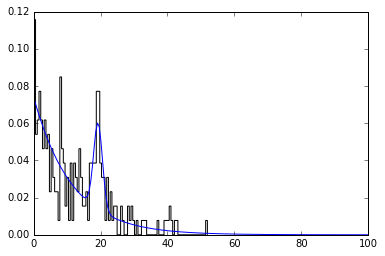

In [6]:
xs = np.linspace(0, 100, 200)
_ = plt.hist(data, bins=100, histtype='step', color='k', normed=True)
plt.plot(xs, model.pdf(xs), 'b-')